<a href="https://colab.research.google.com/github/kensingera24/DeepChem/blob/main/Training_a_Model_with_DeepChem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install DeepChem.
!pip install --pre deepchem[tensorflow]

In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
import deepchem as dc
dc.__version__

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.1.dev'

In [ ]:
# In this tutorial, the problem to be solved is predicting the solubility
# of small molecules given their chemical formulas.

# MoleculeNet is a diverse collection of chemical and molecular data sets
# For this tutorial the Delaney solubility data set will be used.

In [ ]:
# Featurize the data, obtain datasets
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
# Create the model
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)

In [ ]:
# Train the model
# Give it the data and tell it how many epochs of training to perform
# epochs: how many complete passes through the data to make
model.fit(train_dataset, nb_epoch=100)

0.10579402923583985

In [ ]:
# Evaluate the model by calling the evaluate() funciton on the test set
# Use the Pearson correlation, also known as r^2 , as our metric
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

Training set score: {'pearson_r2_score': 0.9282157463206939}
Test set score: {'pearson_r2_score': 0.6467487080052472}


[-1.9458519] [-1.60114461] c1cc2ccc3cccc4ccc(c1)c2c34


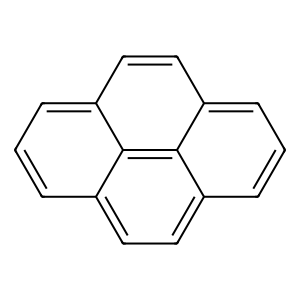

[0.6004965] [0.20848251] Cc1cc(=O)[nH]c(=S)[nH]1


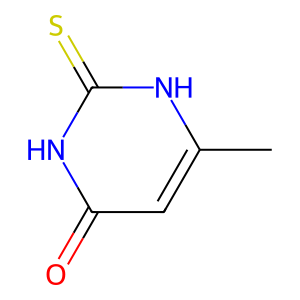

[-0.50204116] [-0.01602738] Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 


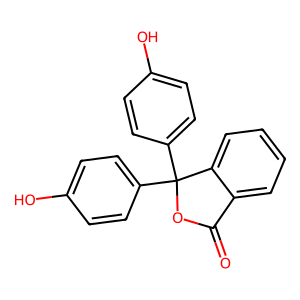

[-2.0016246] [-2.82191713] c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45


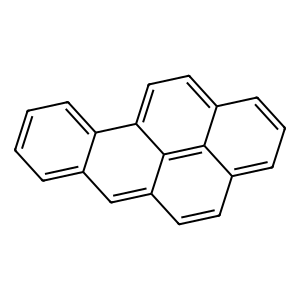

[-1.7063371] [-0.52891635] C1=Cc2cccc3cccc1c23


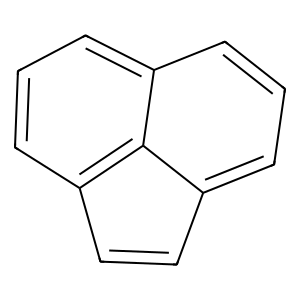

[1.3598222] [1.10168349] CC1CO1


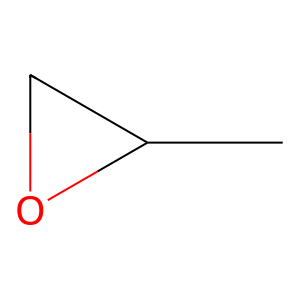

[-0.54337424] [-0.88987406] CCN2c1ccccc1N(C)C(=S)c3cccnc23 


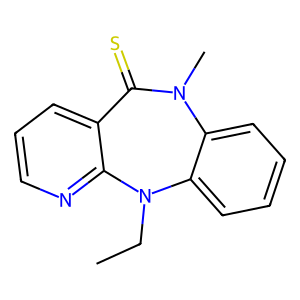

[-0.9610056] [-0.52649706] CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O


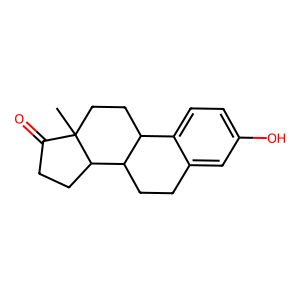

[-2.068977] [-0.76358725] Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F


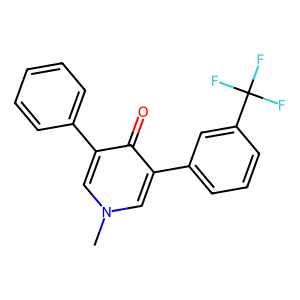

[-0.02239519] [-0.64020358] ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 


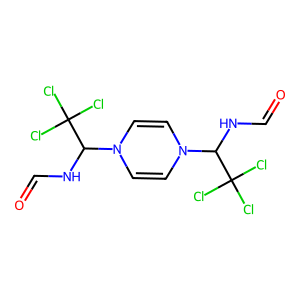

In [ ]:
# From the scores, it is clear that the model is overfitting.
# However, the model performs respectibly on the test set
# Now use the model to make predictions about molecules of interest

# For these purposes, use the first 10 molecules from the test set

# Print the chemical structure (SMILES)
# Predict the solubility in log(solubility); units of moles/L
# View the molecule with RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

solubilities = model.predict_on_batch(test_dataset.X[:10])
for molecule, solubility, test_solubility in zip(test_dataset.ids, solubilities, test_dataset.y):
    print(solubility, test_solubility, molecule)
    m = Chem.MolFromSmiles(molecule)
    img = Draw.MolToImage(m)
    display(img)